In [1]:
import pandas as pd
import seaborn as sns



In [2]:
matches = pd.read_csv('../data/merged_after_odds.csv', index_col=False)



In [3]:
required_columns = [
    "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG"
]
missing_columns = [col for col in required_columns if col not in matches.columns]
if missing_columns:
    raise ValueError(f"Missing required columns in source data: {missing_columns}")

initial_rows = len(matches)
print(f"Initial rows: {initial_rows}")

# Deduplicate fixtures based on unique date/home/away combination
duplicate_mask = matches.duplicated(subset=["Date", "HomeTeam", "AwayTeam"], keep="first")
duplicates_removed = int(duplicate_mask.sum())
if duplicates_removed:
    matches = matches.loc[~duplicate_mask].copy()
    print(f"Removed {duplicates_removed} duplicated fixture rows; {len(matches)} rows remain.")
else:
    print("No duplicated fixture rows detected.")

# Basic sanity checks for match stat completeness (odds excluded)
quality_columns = ["FTHG", "FTAG", "HS", "AS", "HST", "AST", "HC", "AC", "HF", "AF", "HY", "AY", "HR", "AR"]
missing_rows_mask = matches[quality_columns].isna().any(axis=1)
missing_rows = int(missing_rows_mask.sum())
if missing_rows:
    print(f"Removing {missing_rows} rows with missing crucial stats; displaying column counts below.")
    display(matches.loc[missing_rows_mask, quality_columns].isna().sum())
    matches = matches.loc[~missing_rows_mask].copy()
    print(f"Rows remaining after dropping missing stats: {len(matches)}")
else:
    print("No missing crucial stats detected.")

# Ensure Date parsed correctly and drop rows with invalid dates
matches["Date"] = pd.to_datetime(matches["Date"], errors="coerce")
invalid_dates = int(matches["Date"].isna().sum())
if invalid_dates:
    matches = matches.dropna(subset=["Date"])
    print(f"Removed {invalid_dates} rows with invalid dates; {len(matches)} rows remain.")
else:
    print("All rows contain valid dates.")


Initial rows: 7260
No duplicated fixture rows detected.
No missing crucial stats detected.
All rows contain valid dates.


In [4]:
# Additional sanity checks on numeric ranges and team label consistency
count_columns = [
    "FTHG", "FTAG", "HS", "AS", "HST", "AST", "HC", "AC",
    "HF", "AF", "HY", "AY", "HR", "AR"
]
negative_mask = (matches[count_columns] < 0)
if negative_mask.any().any():
    problematic_cols = negative_mask.any(axis=0)
    raise ValueError(f"Negative values found in match stats: {list(problematic_cols[problematic_cols].index)}")
else:
    print("Verified non-negative counts for goals, shots, cards, and fouls.")

home_teams = set(matches["HomeTeam"].unique())
away_teams = set(matches["AwayTeam"].unique())
extra_home = sorted(home_teams - away_teams)
extra_away = sorted(away_teams - home_teams)
if extra_home or extra_away:
    print("Warning: Team naming mismatch detected between home and away columns.")
    display({"only_home": extra_home, "only_away": extra_away})
else:
    print("Home/Away team name sets match exactly.")


Verified non-negative counts for goals, shots, cards, and fouls.
Home/Away team name sets match exactly.


In [5]:
# Persist a stable match identifier for downstream joins
matches = matches.sort_values("Date").reset_index(drop=True)
matches["match_id"] = matches.index
matches.head()


,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HF,AF,HY,AY,HR,AR,B365H,B365D,B365A,match_id
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,18,17,2,3,0,0,NaN,NaN,NaN,0
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,14,14,1,1,0,0,NaN,NaN,NaN,1
2,2000-01-10,E0,Sunderland,Leicester,0,0,0,0,D,11,...,12,8,3,1,0,0,NaN,NaN,NaN,2
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,14,15,0,2,0,0,NaN,NaN,NaN,3
4,2000-02-12,E0,Bradford,Coventry,2,1,0,0,H,10,...,11,12,3,2,0,0,NaN,NaN,NaN,4


In [6]:
matches.shape


(7260, 25)

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7260 non-null   datetime64[ns]
 1   Div       7260 non-null   object        
 2   HomeTeam  7260 non-null   object        
 3   AwayTeam  7260 non-null   object        
 4   FTHG      7260 non-null   int64         
 5   FTAG      7260 non-null   int64         
 6   HTHG      7260 non-null   int64         
 7   HTAG      7260 non-null   int64         
 8   FTR       7260 non-null   object        
 9   HS        7260 non-null   int64         
 10  AS        7260 non-null   int64         
 11  HST       7260 non-null   int64         
 12  AST       7260 non-null   int64         
 13  HC        7260 non-null   int64         
 14  AC        7260 non-null   int64         
 15  HF        7260 non-null   int64         
 16  AF        7260 non-null   int64         
 17  HY        7260

In [8]:
# Preview shown earlier; redundant cell removed.

In [9]:
# Tail preview omitted to reduce noise.

In [10]:
# Removed unused exploratory calculation.

In [11]:
# Shape already captured earlier.

In [12]:
matches['HomeTeam'].value_counts()

HomeTeam
Arsenal             364
Chelsea             364
Everton             364
Man United          363
Liverpool           362
Tottenham           361
Man City            344
Newcastle           326
Aston Villa         317
West Ham            307
Sunderland          266
Fulham              254
Southampton         229
West Brom           228
Bolton              209
Blackburn           209
Stoke               190
Middlesbrough       171
Leicester           154
Wigan               152
Crystal Palace      134
Swansea             133
Birmingham          133
Charlton            133
Portsmouth          133
Norwich             108
Burnley              97
Watford              97
Wolves               97
Hull                 95
Bournemouth          79
Leeds                76
QPR                  57
Reading              57
Derby                57
Brighton             39
Ipswich              38
Sheffield United     32
Cardiff              28
Huddersfield         27
Coventry             19
Bradfor

### The data type of each columns


In [13]:
# Data types captured above via matches.info().

In [14]:
# Date summary available via validations above.

In [15]:
# Duplicate dtype display removed.


In [16]:
# Preview already shown once.

In [17]:
# Legacy home/away reshaping removed – matches_long below now powers the modeling pipeline.


In [18]:
matches['opp_code'] = matches['AwayTeam'].astype('category').cat.codes

In [19]:
matches['day_code'] = matches['Date'].dt.dayofweek

In [20]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HY,AY,HR,AR,B365H,B365D,B365A,match_id,opp_code,day_code
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,2,3,0,0,NaN,NaN,NaN,0,25,0
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,1,1,0,0,NaN,NaN,NaN,1,23,0
2,2000-01-10,E0,Sunderland,Leicester,0,0,0,0,D,11,...,3,1,0,0,NaN,NaN,NaN,2,22,0
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,0,2,0,0,NaN,NaN,NaN,3,34,5
4,2000-02-12,E0,Bradford,Coventry,2,1,0,0,H,10,...,3,2,0,0,NaN,NaN,NaN,4,13,5


In [21]:
matches.tail()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HY,AY,HR,AR,B365H,B365D,B365A,match_id,opp_code,day_code
7255,2020-11-01,E0,Everton,Brighton,1,0,1,0,H,14,...,2,1,0,0,1.85,3.8,4.00,7255,8,6
7256,2020-11-01,E0,Crystal Palace,Arsenal,1,1,0,1,D,6,...,2,3,0,1,4.10,3.9,1.80,7256,0,6
7257,2020-11-01,E0,Chelsea,Burnley,3,0,2,0,H,18,...,0,3,0,0,1.28,5.5,11.00,7257,9,6
7258,2020-12-01,E0,Bournemouth,Watford,0,3,0,1,A,10,...,1,1,0,0,2.60,3.3,2.70,7258,39,1
7259,2020-12-01,E0,Aston Villa,Man City,1,6,0,4,A,7,...,2,1,0,0,13.00,8.5,1.16,7259,24,1


In [22]:
matches.shape

(7260, 27)

## Created a result column to add W for Home Win and L for Home Loss

In [23]:
matches["result"] = matches.apply(
    lambda row: "W" if row["FTHG"] > row["FTAG"] 
                else ("L" if row["FTHG"] < row["FTAG"] else "D"),
    axis=1
)

In [24]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AY,HR,AR,B365H,B365D,B365A,match_id,opp_code,day_code,result
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,3,0,0,NaN,NaN,NaN,0,25,0,W
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,1,0,0,NaN,NaN,NaN,1,23,0,W
2,2000-01-10,E0,Sunderland,Leicester,0,0,0,0,D,11,...,1,0,0,NaN,NaN,NaN,2,22,0,D
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,2,0,0,NaN,NaN,NaN,3,34,5,W
4,2000-02-12,E0,Bradford,Coventry,2,1,0,0,H,10,...,2,0,0,NaN,NaN,NaN,4,13,5,W


In [25]:
matches['target'] = (matches['result']== 'W').astype('int')

In [26]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HR,AR,B365H,B365D,B365A,match_id,opp_code,day_code,result,target
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,0,0,NaN,NaN,NaN,0,25,0,W,1
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,0,0,NaN,NaN,NaN,1,23,0,W,1
2,2000-01-10,E0,Sunderland,Leicester,0,0,0,0,D,11,...,0,0,NaN,NaN,NaN,2,22,0,D,0
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,0,0,NaN,NaN,NaN,3,34,5,W,1
4,2000-02-12,E0,Bradford,Coventry,2,1,0,0,H,10,...,0,0,NaN,NaN,NaN,4,13,5,W,1


In [27]:
matches.tail()


,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HR,AR,B365H,B365D,B365A,match_id,opp_code,day_code,result,target
7255,2020-11-01,E0,Everton,Brighton,1,0,1,0,H,14,...,0,0,1.85,3.8,4.00,7255,8,6,W,1
7256,2020-11-01,E0,Crystal Palace,Arsenal,1,1,0,1,D,6,...,0,1,4.10,3.9,1.80,7256,0,6,D,0
7257,2020-11-01,E0,Chelsea,Burnley,3,0,2,0,H,18,...,0,0,1.28,5.5,11.00,7257,9,6,W,1
7258,2020-12-01,E0,Bournemouth,Watford,0,3,0,1,A,10,...,0,0,2.60,3.3,2.70,7258,39,1,L,0
7259,2020-12-01,E0,Aston Villa,Man City,1,6,0,4,A,7,...,0,0,13.00,8.5,1.16,7259,24,1,L,0


In [28]:
matches[["match_id", "Date"]].tail()

,match_id,Date
7255,7255,2020-11-01
7256,7256,2020-11-01
7257,7257,2020-11-01
7258,7258,2020-12-01
7259,7259,2020-12-01


In [29]:
matches.tail()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HR,AR,B365H,B365D,B365A,match_id,opp_code,day_code,result,target
7255,2020-11-01,E0,Everton,Brighton,1,0,1,0,H,14,...,0,0,1.85,3.8,4.00,7255,8,6,W,1
7256,2020-11-01,E0,Crystal Palace,Arsenal,1,1,0,1,D,6,...,0,1,4.10,3.9,1.80,7256,0,6,D,0
7257,2020-11-01,E0,Chelsea,Burnley,3,0,2,0,H,18,...,0,0,1.28,5.5,11.00,7257,9,6,W,1
7258,2020-12-01,E0,Bournemouth,Watford,0,3,0,1,A,10,...,0,0,2.60,3.3,2.70,7258,39,1,L,0
7259,2020-12-01,E0,Aston Villa,Man City,1,6,0,4,A,7,...,0,0,13.00,8.5,1.16,7259,24,1,L,0


In [30]:
matches.dtypes

Date        datetime64[ns]
Div                 object
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
HTHG                 int64
HTAG                 int64
FTR                 object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HC                   int64
AC                   int64
HF                   int64
AF                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
B365H              float64
B365D              float64
B365A              float64
match_id             int64
opp_code              int8
day_code             int32
result              object
target               int64
dtype: object

In [31]:
# training on 2000–2016, testing on 2017–2018
train = matches[matches["Date"] < "2017-01-01"]
test  = matches[matches["Date"] >= "2017-01-01"]



In [32]:
matches.columns.tolist()


['Date',
 'Div',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'HTHG',
 'HTAG',
 'FTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'match_id',
 'opp_code',
 'day_code',
 'result',
 'target']

In [33]:
train.shape

(6268, 29)

In [34]:
test.shape

(992, 29)

In [35]:
predictors = ["opp_code", "day_code"]

In [36]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [37]:
model = xgb.XGBClassifier(n_estimators=200, random_state= 42, eta = 0.01)



In [38]:
model.fit(train[predictors], train["target"])


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [39]:
preds = model.predict(test[predictors])


preds

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
acc = accuracy_score(test["target"], preds)


In [42]:
acc

0.5715725806451613

In [43]:
combined = pd.DataFrame(dict(actual = test["target"], prediction = preds))

In [44]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,362,177
1,248,205


In [45]:
from sklearn.metrics import precision_score

In [46]:
precision_score(test["target"], preds)

0.5366492146596858

#### This function returns the matches played by a specific team both home or away

In [47]:
def get_team_matches(df, team_name):
    return df[(df["HomeTeam"] == team_name) | (df["AwayTeam"] == team_name)]



In [48]:
liverpool_matches = get_team_matches(matches, "Liverpool")

liverpool_matches

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HR,AR,B365H,B365D,B365A,match_id,opp_code,day_code,result,target
1,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,0,0,NaN,NaN,NaN,1,23,0,W,1
7,2000-02-12,E0,Liverpool,Charlton,3,0,1,0,H,13,...,0,0,NaN,NaN,NaN,7,11,5,W,1
15,2000-04-11,E0,Leeds,Liverpool,4,3,1,2,H,10,...,0,0,NaN,NaN,NaN,15,23,1,W,1
30,2000-06-09,E0,Liverpool,Aston Villa,3,1,3,0,H,11,...,0,0,NaN,NaN,NaN,30,1,4,W,1
37,2000-08-19,E0,Liverpool,Bradford,1,0,0,0,H,16,...,0,0,NaN,NaN,NaN,37,7,5,W,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,2020-01-23,E0,Wolves,Liverpool,1,2,0,1,A,10,...,0,0,5.75,3.80,1.61,7235,23,3,L,0
7236,2020-01-29,E0,West Ham,Liverpool,0,2,0,1,A,7,...,0,0,8.50,5.50,1.33,7236,23,2,L,0
7237,2020-02-01,E0,Liverpool,Sheffield United,2,0,1,0,H,19,...,0,0,1.20,6.50,13.00,7237,33,5,W,1
7241,2020-02-15,E0,Norwich,Liverpool,0,1,0,0,A,5,...,0,0,11.00,6.25,1.25,7241,23,5,L,0


In [49]:
home = matches.rename(columns={
    "HomeTeam": "Team",
    "AwayTeam": "Opponent",
    "FTHG": "gf",
    "FTAG": "ga"
}).copy()
home["Venue"] = "H"
home["match_id"] = matches["match_id"]

away = matches.rename(columns={
    "AwayTeam": "Team",
    "HomeTeam": "Opponent",
    "FTAG": "gf",
    "FTHG": "ga"
}).copy()
away["Venue"] = "A"
away["match_id"] = matches["match_id"]

# Combine them
matches_long = pd.concat([home, away], ignore_index=True)


In [50]:
# Venue-encoding column removed (unused downstream).

In [51]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("Date")
    rolling_stats = group[cols].rolling(3, closed = "left").mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset = new_cols)
    return group

In [52]:
cols = ['gf', 'ga', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC']
new_cols = [f"{c}_rolling" for c in cols]

In [53]:
new_cols

['gf_rolling',
 'ga_rolling',
 'HS_rolling',
 'AS_rolling',
 'HST_rolling',
 'AST_rolling',
 'HC_rolling',
 'AC_rolling']

In [54]:
group_matches = matches_long.groupby("Team") 

In [55]:
group = group_matches.get_group("Arsenal")
group

,Date,Div,Team,Opponent,gf,ga,HTHG,HTAG,FTR,HS,...,AR,B365H,B365D,B365A,match_id,opp_code,day_code,result,target,Venue
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,0,NaN,NaN,NaN,0,25,0,W,1,H
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,0,NaN,NaN,NaN,3,34,5,W,1,H
43,2000-08-21,E0,Arsenal,Liverpool,2,0,1,0,H,17,...,2,NaN,NaN,NaN,43,23,0,W,1,H
53,2000-08-26,E0,Arsenal,Charlton,5,3,1,2,H,18,...,0,NaN,NaN,NaN,53,11,5,W,1,H
72,2000-09-12,E0,Arsenal,Newcastle,5,0,2,0,H,15,...,0,NaN,NaN,NaN,72,28,1,W,1,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14435,2019-12-21,E0,Arsenal,Everton,0,0,0,0,D,9,...,0,2.30,3.8,2.87,7175,0,5,D,0,A
14444,2019-12-26,E0,Arsenal,Bournemouth,1,1,1,0,D,12,...,0,3.50,3.9,1.95,7184,0,3,D,0,A
14486,2020-01-21,E0,Arsenal,Chelsea,2,2,1,0,D,19,...,1,1.72,3.9,4.50,7226,0,1,D,0,A
14499,2020-02-02,E0,Arsenal,Burnley,0,0,0,0,D,15,...,0,3.60,3.6,2.00,7239,0,6,D,0,A


In [56]:
rolling_averages(group, cols, new_cols)

,Date,Div,Team,Opponent,gf,ga,HTHG,HTAG,FTR,HS,...,target,Venue,gf_rolling,ga_rolling,HS_rolling,AS_rolling,HST_rolling,AST_rolling,HC_rolling,AC_rolling
7288,2000-06-09,E0,Arsenal,Chelsea,2,2,1,0,D,12,...,0,A,1.000000,0.000000,11.666667,10.333333,6.666667,5.666667,8.000000,9.000000
7298,2000-08-19,E0,Arsenal,Sunderland,0,1,0,0,H,8,...,1,A,1.333333,0.666667,13.333333,10.333333,6.666667,6.000000,9.333333,7.333333
43,2000-08-21,E0,Arsenal,Liverpool,2,0,1,0,H,17,...,1,H,1.000000,1.000000,8.000000,12.666667,3.333333,6.666667,4.666667,7.666667
53,2000-08-26,E0,Arsenal,Charlton,5,3,1,2,H,18,...,1,H,1.333333,1.000000,12.333333,11.333333,6.333333,5.333333,6.333333,8.666667
7328,2000-09-09,E0,Arsenal,Bradford,1,1,1,0,D,9,...,0,A,2.333333,1.333333,14.333333,9.333333,7.666667,5.000000,6.666667,7.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,2020-01-18,E0,Arsenal,Sheffield United,1,1,1,0,D,11,...,0,H,1.333333,1.000000,9.666667,13.333333,3.333333,3.333333,3.666667,3.333333
14486,2020-01-21,E0,Arsenal,Chelsea,2,2,1,0,D,19,...,0,A,1.333333,1.000000,9.333333,11.666667,3.333333,4.000000,2.333333,4.000000
14499,2020-02-02,E0,Arsenal,Burnley,0,0,0,0,D,15,...,0,A,1.666667,1.000000,13.333333,8.000000,5.333333,3.333333,7.333333,4.666667
7244,2020-02-16,E0,Arsenal,Newcastle,4,0,0,0,H,15,...,1,H,1.000000,1.000000,15.000000,9.000000,4.666667,2.666667,8.666667,5.666667


In [57]:
rolling_base_cols = [
    "Date", "Opponent", "Venue", "match_id", "FTR", "opp_code", "day_code", "target"
] + cols
matches_rolling = matches_long.groupby("Team", group_keys=False)[rolling_base_cols].apply(
    lambda x: rolling_averages(x, cols, new_cols)
)
matches_rolling = matches_rolling.join(matches_long[["Team"]], how="left")

In [58]:
matches_rolling

,Date,Opponent,Venue,match_id,FTR,opp_code,day_code,target,gf,ga,...,AC,gf_rolling,ga_rolling,HS_rolling,AS_rolling,HST_rolling,AST_rolling,HC_rolling,AC_rolling,Team
7288,2000-06-09,Chelsea,A,28,D,0,4,0,2,2,...,6,1.000000,0.000000,11.666667,10.333333,6.666667,5.666667,8.000000,9.000000,Arsenal
7298,2000-08-19,Sunderland,A,38,H,0,5,1,0,1,...,9,1.333333,0.666667,13.333333,10.333333,6.666667,6.000000,9.333333,7.333333,Arsenal
43,2000-08-21,Liverpool,H,43,H,23,0,1,2,0,...,11,1.000000,1.000000,8.000000,12.666667,3.333333,6.666667,4.666667,7.666667,Arsenal
53,2000-08-26,Charlton,H,53,H,11,5,1,5,3,...,3,1.333333,1.000000,12.333333,11.333333,6.333333,5.333333,6.333333,8.666667,Arsenal
7328,2000-09-09,Bradford,A,68,D,0,5,0,1,1,...,10,2.333333,1.333333,14.333333,9.333333,7.666667,5.000000,6.666667,7.666667,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14474,2020-01-02,Man United,A,7214,D,43,3,0,0,0,...,6,1.333333,1.666667,13.000000,11.000000,4.666667,3.000000,4.000000,4.666667,Wolves
14476,2020-01-18,Southampton,A,7216,A,43,5,0,3,2,...,3,0.333333,1.000000,11.333333,13.333333,3.666667,3.000000,4.333333,6.333333,Wolves
7235,2020-01-23,Liverpool,H,7235,A,23,3,0,1,2,...,4,1.333333,1.333333,11.666667,12.666667,4.333333,3.666667,3.000000,5.333333,Wolves
7240,2020-02-14,Leicester,H,7240,D,22,4,0,0,0,...,0,1.333333,1.333333,12.000000,11.666667,4.333333,4.333333,2.333333,4.333333,Wolves


In [59]:
matches_rolling = matches_rolling.sort_values(["Date", "Team"])

In [60]:
matches_rolling

,Date,Opponent,Venue,match_id,FTR,opp_code,day_code,target,gf,ga,...,AC,gf_rolling,ga_rolling,HS_rolling,AS_rolling,HST_rolling,AST_rolling,HC_rolling,AC_rolling,Team
22,2000-05-09,Bradford,H,22,H,7,1,1,6,0,...,1,1.333333,0.666667,9.000000,9.666667,5.000000,4.333333,4.333333,8.333333,Man United
21,2000-05-09,West Ham,H,21,D,41,1,0,1,1,...,11,1.000000,0.666667,15.333333,9.000000,7.333333,2.333333,7.333333,4.333333,Sunderland
7288,2000-06-09,Chelsea,A,28,D,0,4,0,2,2,...,6,1.000000,0.000000,11.666667,10.333333,6.666667,5.666667,8.000000,9.000000,Arsenal
28,2000-06-09,Arsenal,H,28,D,0,4,0,2,2,...,6,2.333333,1.333333,10.000000,10.000000,5.333333,3.666667,5.666667,6.000000,Chelsea
31,2000-06-09,Ipswich,H,31,H,20,4,1,2,1,...,2,1.333333,0.333333,11.000000,7.666667,4.333333,2.666667,5.000000,4.000000,Leicester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,2020-11-01,Newcastle,H,7252,D,28,6,0,1,1,...,2,1.333333,1.333333,12.000000,10.000000,3.666667,4.333333,3.333333,2.333333,Wolves
7259,2020-12-01,Man City,H,7259,A,24,1,0,1,6,...,4,1.666667,1.666667,14.666667,13.000000,3.666667,5.000000,7.000000,4.666667,Aston Villa
7258,2020-12-01,Watford,H,7258,A,39,1,0,0,3,...,5,1.333333,1.333333,14.333333,12.333333,4.666667,4.333333,5.666667,5.666667,Bournemouth
14519,2020-12-01,Aston Villa,A,7259,A,24,1,0,6,1,...,4,1.000000,0.666667,9.000000,13.000000,3.666667,3.333333,4.333333,6.666667,Man City


In [61]:
def make_predictions(data, predictors):
    train = data[data["Date"] < "2017-01-01"]
    test  = data[data["Date"] >= "2017-01-01"]
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    combined = pd.DataFrame(dict(actual = test["target"], prediction = preds), index=test.index)
    precision = precision_score(test["target"], preds)
    return combined, precision

In [62]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols )

combined returns only the actual and prediction but not team names

In [63]:
combined

,actual,prediction
6268,1,0
13528,1,0
13529,0,0
6269,0,0
13531,0,0
...,...,...
7252,0,0
7259,0,0
7258,0,1
14519,0,0


In [64]:
precision

0.5278137128072445

In [65]:
combined = combined.merge(
    matches_rolling[["Date", "Team", "Opponent", "FTR", "match_id"]],
    left_index=True,
    right_index=True
)

In [66]:
combined

,actual,prediction,Date,Team,Opponent,FTR,match_id
6268,1,0,2017-01-01,Arsenal,Crystal Palace,H,6268
13528,1,0,2017-01-01,Crystal Palace,Arsenal,H,6268
13529,0,0,2017-01-01,Tottenham,Watford,A,6269
6269,0,0,2017-01-01,Watford,Tottenham,A,6269
13531,0,0,2017-01-02,Everton,Stoke,D,6271
...,...,...,...,...,...,...,...
7252,0,0,2020-11-01,Wolves,Newcastle,D,7252
7259,0,0,2020-12-01,Aston Villa,Man City,A,7259
7258,0,1,2020-12-01,Bournemouth,Watford,A,7258
14519,0,0,2020-12-01,Man City,Aston Villa,A,7259


In [67]:
merged = combined.merge(combined, left_on= ["Date", "Team"], right_on =  ["Date", "Opponent"])

In [68]:
merged

,actual_x,prediction_x,Date,Team_x,Opponent_x,FTR_x,match_id_x,actual_y,prediction_y,Team_y,Opponent_y,FTR_y,match_id_y
0,1,0,2017-01-01,Arsenal,Crystal Palace,H,6268,1,0,Crystal Palace,Arsenal,H,6268
1,1,0,2017-01-01,Crystal Palace,Arsenal,H,6268,1,0,Arsenal,Crystal Palace,H,6268
2,0,0,2017-01-01,Tottenham,Watford,A,6269,0,0,Watford,Tottenham,A,6269
3,0,0,2017-01-01,Watford,Tottenham,A,6269,0,0,Tottenham,Watford,A,6269
4,0,0,2017-01-02,Everton,Stoke,D,6271,0,0,Stoke,Everton,D,6271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,0,0,2020-11-01,Wolves,Newcastle,D,7252,0,0,Newcastle,Wolves,D,7252
1968,0,0,2020-12-01,Aston Villa,Man City,A,7259,0,0,Man City,Aston Villa,A,7259
1969,0,1,2020-12-01,Bournemouth,Watford,A,7258,0,1,Watford,Bournemouth,A,7258
1970,0,0,2020-12-01,Man City,Aston Villa,A,7259,0,0,Aston Villa,Man City,A,7259


Below returns the data where Team_x was predicted to win but Team_y was predicted to lose

In [69]:
merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == 0)]["actual_x"].value_counts()


actual_x
1    101
0     96
Name: count, dtype: int64

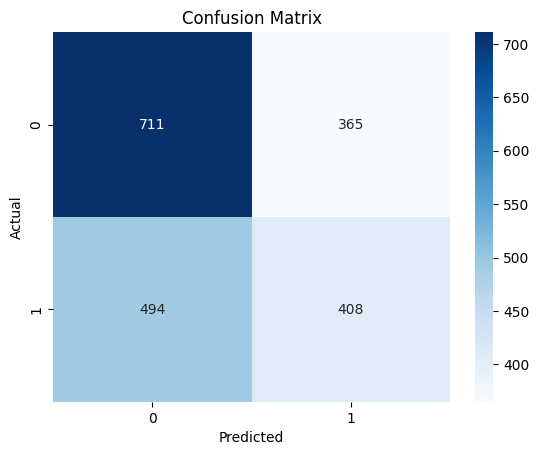

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(combined["actual"], combined["prediction"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()